In [10]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.csv',header=None,names=names,sep=';')

In [12]:
df.head()
#df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# We change the M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
df.shape

(4177, 9)

In [16]:
from sklearn.preprocessing import Normalizer

# Take Abalone dataset. Run some clustering method (except k-means) with different number of clusters.Which number of clusters is better?

In [17]:
# assigning input array
X = df.iloc[:,:9].values
scaler = Normalizer()
scaler.fit(X)
X_scaled = scaler.transform(X)

# AgglomerativeClustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import metrics
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
label_pred= agg.fit_predict(X_scaled)

Text(0,0.5,'Feature 1')

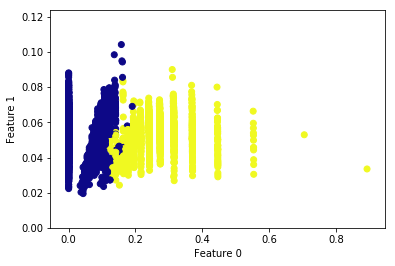

In [19]:
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [20]:
 # to measure accuracy using silhouette_score
print("silhouette_score for " ,2, ' clusters is :%.3f' %(silhouette_score(agg.labels_,label_pred)))

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

In [8]:
print(adjusted_rand_score(X_scaled,label_pred))

NameError: name 'X_scaled' is not defined

In [ ]:
agg = AgglomerativeClustering(n_clusters=5)
label_pred= agg.fit_predict(X_scaled)
print("silhouette_score for " , 5,' clusters is :%.3f' %(silhouette_score(X_scaled,label_pred)))

In [ ]:
label_pred

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
agg = AgglomerativeClustering(n_clusters=8)
label_pred= agg.fit_predict(X_scaled)
print("silhouette_score for " , 8, ' clusters is  :%.3f' %(silhouette_score(X_scaled,label_pred)))

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=label_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### comment: When the cluster no 2 , it gives highest score. Therefore we can say that 2 no of cluster is better.

### 2.Take Abalone dataset. Reduce it’s dimensionality to 3 with Kernel PCA, then run clustering with 10 clusters.


In [ ]:
 #standardising the input features before applying clustering method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_2 = scaler.transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA
# keep the first three principal components of the data
pca = KernelPCA(n_components=3, kernel='cosine',fit_inverse_transform=True)
# fit PCA model to abalone dataset
pca.fit(X_2)
# transform data onto the first three principal components
X_pca = pca.transform(X_2)
print("Original shape: {}".format(str(X_2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

In [ ]:
#fitting by kmeans clustering method with 10 cluster
#finding the data point closest to the centroids of the clusters
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10).fit(X_pca)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X_pca)
closest

In [ ]:
 #x[3762] is the data point closest to the centroid of cluster 0
#the age of the data point closest to the centroid 0 is 2.5
X[3762]

In [ ]:
#cross checking with the df at the index location mentioned by 'closest' array
df.loc[3762]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

In [ ]:
#printing cluster labels
print("Cluster labels:", (kmeans.labels_))

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#finding the cluster centroids
print(" cluster centre:\n" , kmeans.cluster_centers_)

In [ ]:
centers.shape

In [ ]:
inverse1 = pca.inverse_transform(centers)
inverse1.shape

In [ ]:
inverse2 = scaler.inverse_transform(inverse1)
inverse2.shape

In [ ]:
X_centers = pd.DataFrame(data=inverse2, columns=df.columns)
X_centers

In [ ]:
#Age of cluster centroids is Rings+1.5
X_centers['Age'] = X_centers.Rings + 1.5

In [ ]:
age_cluster_Centroids = X_centers.Age
age_cluster_Centroids

# 3. Label propagation:

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

# cluster Abalone dataset without age (rings) feature using Gaussian Mixture Model

In [ ]:
#abalone Dataset without ring
X_df = df.drop(['Rings'],axis=1)


In [ ]:
#X_df.head()

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_df)
X_scaled = scaler.transform(X_df)

In [ ]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=12)
gmm.fit(X_scaled)
labels=gmm.predict(X_scaled)


In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=40, cmap='viridis')

In [ ]:
#print(proba_lists[:5].round(3))

#### take randomly 20 samples with age from the original Abalone dataset, predict their probabilities with GaussianMM ("predict_proba")

In [ ]:
# small abalone dataset with ring
X_small=df.sample(20)
rings= df['Rings'].sample(20)
X_small.head()

In [ ]:
scaler = Normalizer()
scaler.fit(X_small)
X1_scaled = scaler.transform(X_small)

In [ ]:
gmm = GaussianMixture(n_components=12)
gmm.fit(X1_scaled)
labels=gmm.predict(X1_scaled)
cluster = gmm.predict_proba(X1_scaled)


In [ ]:
print(cluster[:5].round(3))

In [ ]:
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=labels, s=40, cmap='viridis')

In [ ]:
#Transform 'Rings' to multiple class
rings=pd.get_dummies(rings)
ring_values= np.array(rings.columns)

In [ ]:
#rings.head()

In [ ]:
#ring_values

In [ ]:
#Get cluster x class matrix
cluster_age = cluster.T @ rings
# normalize so probabilities sum up to 1
cluster_age = cluster_age / cluster_age.sum(1)[:,None]
#cluster_age

In [ ]:
#Get samples x class matrix
predicted_classes= gmm.predict_proba(X) @ cluster_age
#predicted_classes[:3]

In [ ]:
#Predict rings by multiplying 'Rings' values of classes with class probabilities

predicted_age= predicted_classes @ ring_values

In [ ]:
predicted_age.shape

In [ ]:
predicted_age.round(3)